In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
data= pd.read_csv('testdataEP1.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/Crop/District  144 non-null    object 
 1   Year                 144 non-null    int64  
 2   Season               144 non-null    object 
 3   Area (Hectare)       144 non-null    int64  
 4   Production (Tonnes)  144 non-null    int64  
 5   Yield                144 non-null    float64
 6   AS%                  144 non-null    float64
 7   SrAc%                144 non-null    float64
 8   HAc%                 144 non-null    float64
 9   MAc%                 144 non-null    float64
 10  SlAc%                144 non-null    float64
 11  N%                   144 non-null    float64
 12  MAl%                 144 non-null    float64
 13  SlAl%                144 non-null    float64
 14  N%.1                 144 non-null    float64
 15  OC%                  144 non-null    flo

In [6]:

for col in data:
    print(data[col].name,data[col].nunique())

State/Crop/District 27
Year 5
Season 2
Area (Hectare) 130
Production (Tonnes) 121
Yield  115
AS% 20
SrAc% 17
HAc% 31
MAc% 50
SlAc% 50
N% 43
MAl% 52
SlAl% 44
N%.1 39
OC% 38
P% 31
K% 18
Zn % 38
Fe % 37
Cu % 11
Mn % 23
B % 38
S % 36
Rainfall 99
Temp_Max 101
Temp_Min 117


In [7]:
data.describe()


,Year,Area (Hectare),Production (Tonnes),Yield,AS%,SrAc%,HAc%,MAc%,SlAc%,N%,...,K%,Zn %,Fe %,Cu %,Mn %,B %,S %,Rainfall,Temp_Max,Temp_Min
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,99.000000,144.000000,144.000000
mean,201669.618056,41347.909722,84587.631944,1.880903,0.098264,0.316806,4.229931,18.078958,12.724722,1.198333,...,0.066806,0.514792,0.503333,0.978125,0.914792,0.416736,0.361597,1195.273352,35.827083,19.175694
std,111.371739,51624.351502,109711.565026,0.999900,0.104636,0.688873,9.196289,20.325601,12.067021,1.558870,...,0.066707,0.211551,0.290037,0.026284,0.109032,0.266447,0.241966,555.946734,4.870165,1.816379
min,201516.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.070000,0.820000,0.530000,0.000000,0.000000,454.790000,29.230000,12.860000
25%,201617.000000,1515.000000,1297.500000,1.200000,0.030000,0.010000,0.030000,1.390000,3.150000,0.320000,...,0.010000,0.340000,0.270000,0.967500,0.910000,0.190000,0.180000,767.658750,31.887500,18.347500
50%,201667.500000,10590.000000,17250.000000,2.005000,0.060000,0.020000,0.430000,7.690000,6.790000,0.810000,...,0.040000,0.530000,0.445000,0.990000,0.940000,0.390000,0.350000,1071.880000,34.690000,19.430000
75%,201743.250000,72886.500000,146750.000000,2.570000,0.110000,0.160000,1.790000,29.170000,19.910000,1.300000,...,0.100000,0.652500,0.770000,0.990000,0.990000,0.610000,0.570000,1435.462000,40.115000,20.307500
max,201819.000000,180200.000000,423300.000000,4.500000,0.450000,3.540000,40.120000,69.970000,44.990000,7.490000,...,0.280000,0.930000,0.980000,1.000000,1.000000,0.970000,0.850000,2693.125000,45.140000,22.530000


In [8]:
# Labels are the values we want to predict
labels = np.array(data['Yield '])

In [9]:
#set target 
data1= data.drop('Yield ',axis =1)

In [10]:
print(labels)

[1.23 1.75 2.3  0.41 0.21 0.67 0.34 0.41 0.48 0.   0.7  0.46 0.31 1.49
 2.06 2.06 2.26 1.22 2.29 2.13 2.86 0.4  0.82 1.74 1.72 1.72 0.72 2.01
 1.76 1.6  1.17 1.64 2.01 1.35 0.84 2.   1.85 2.04 1.22 1.94 1.8  1.85
 1.53 2.53 2.44 2.41 1.58 2.44 2.5  2.97 2.45 3.67 3.48 4.5  3.05 3.91
 3.08 3.41 0.08 0.27 0.29 0.21 1.21 1.94 2.   1.89 2.67 2.07 2.92 0.25
 0.5  2.4  1.43 1.85 0.88 2.74 0.92 1.16 1.13 0.86 1.45 2.03 2.12 1.71
 0.1  0.19 0.29 2.3  2.86 2.91 2.42 1.85 2.52 1.76 2.64 0.2  0.2  1.97
 2.16 2.38 1.83 2.93 3.14 2.72 3.05 2.71 3.16 2.83 3.18 2.45 3.14 2.5
 2.98 3.45 3.17 3.   1.92 2.55 2.31 2.63 1.51 1.75 1.81 2.32 2.94 2.35
 3.29 2.13 3.25 2.11 2.94 3.01 0.   0.22 0.12 0.09 2.26 2.5  2.72 1.
 1.85 2.08 2.54 2.89]


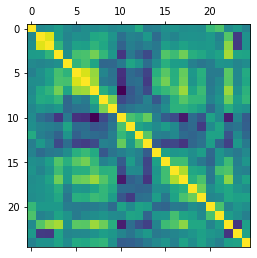

In [11]:
plt.matshow(data.corr())

<AxesSubplot:>

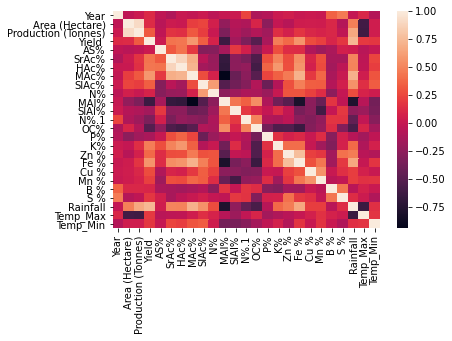

In [12]:

import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
# Identify categorical columns with low cardinality (a small number of distinct values)
def low_cardinality_cols(data_frame):
    low_cardinality_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].nunique() < 70 and
                                data_frame[cname].dtype == "object"]
    return(low_cardinality_cols)
  
cat_data_features =low_cardinality_cols(data)

In [14]:
# Identify numeric columns
def numeric_cols(data_frame):
    numeric_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].dtype in ['int64', 'float64']]
    return(numeric_cols)
  
  
num_data_features = numeric_cols(data)

In [15]:
data_one_hot = pd.get_dummies(data[cat_data_features + num_data_features])
#data_one_hot.replace(-np.inf,np.nan)
data_one_hot = data_one_hot.drop('Yield ',axis = 1)
np.nan_to_num(data_one_hot)

array([[2.01516e+05, 1.40000e+04, 1.72000e+04, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01617e+05, 1.50000e+04, 2.62000e+04, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01718e+05, 1.62000e+04, 3.73000e+04, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [2.01718e+05, 4.80000e+01, 1.00000e+02, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01819e+05, 5.48850e+04, 1.39368e+05, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01819e+05, 3.80000e+01, 1.10000e+02, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00]])

<AxesSubplot:>

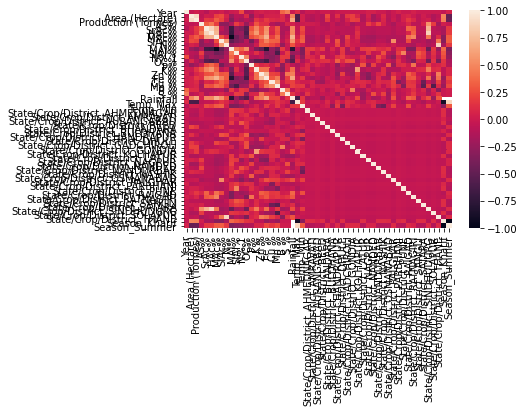

In [16]:
import seaborn as sns
corr = data_one_hot.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

In [17]:

data_one_hot.columns

Index(['Year', 'Area (Hectare)', 'Production (Tonnes)', 'AS%', 'SrAc%', 'HAc%',
       'MAc%', 'SlAc%', 'N%', 'MAl%', 'SlAl%', 'N%.1', 'OC%', 'P%', 'K%',
       'Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %', 'Rainfall', 'Temp_Max',
       'Temp_Min', 'State/Crop/District_AHMEDNAGAR',
       'State/Crop/District_AMRAVATI', 'State/Crop/District_AURANGABAD',
       'State/Crop/District_BEED', 'State/Crop/District_BHANDARA',
       'State/Crop/District_BULDHANA', 'State/Crop/District_CHANDRAPUR',
       'State/Crop/District_DHULE', 'State/Crop/District_GADCHIROLI',
       'State/Crop/District_GONDIA', 'State/Crop/District_KOLHAPUR',
       'State/Crop/District_LATUR', 'State/Crop/District_NAGPUR',
       'State/Crop/District_NANDED', 'State/Crop/District_NANDURBAR',
       'State/Crop/District_NASHIK', 'State/Crop/District_OSMANABAD',
       'State/Crop/District_PALGHAR', 'State/Crop/District_PARBHANI',
       'State/Crop/District_PUNE', 'State/Crop/District_RAIGAD',
       'State/Crop/Dist

In [145]:
data1_Train , data1_Test , labels_Train , labels_Test = train_test_split(data_one_hot , labels ,test_size =0.05)

In [146]:
np.nan_to_num(data1_Train)

array([[2.01819e+05, 5.48850e+04, 1.39368e+05, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01718e+05, 1.10500e+05, 2.99000e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01819e+05, 1.94500e+03, 4.04000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [2.01819e+05, 1.65010e+05, 3.51437e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01819e+05, 3.90000e+02, 1.33000e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01516e+05, 5.27000e+04, 7.97000e+04, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [147]:
np.where(np.isnan(data1_Train))
data1_Train=np.nan_to_num(data1_Train)
data1_Test = np.nan_to_num(data1_Test)

In [148]:
labels_Train = np.nan_to_num(labels_Train)
labels_Test = np.nan_to_num(labels_Test)

In [149]:
#Random Forest regressor
model = RandomForestRegressor(max_depth =25, n_estimators =1000 ,min_samples_split =10)

In [150]:
np.where(np.isnan(data1_Train))

(array([], dtype=int64), array([], dtype=int64))

In [151]:
model.fit(data1_Train,labels_Train)

RandomForestRegressor(max_depth=25, min_samples_split=10, n_estimators=1000)

In [152]:
from sklearn.metrics import mean_absolute_error
Train_accuracy = model.score(data1_Train,labels_Train)
Test_accuracy = model.score(data1_Test,labels_Test)
print('Train_accuracy: ',Train_accuracy)
print('Test accuracy: ',Test_accuracy)

Train_accuracy:  0.9157852151737009
Test accuracy:  0.884490189170257


In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
y_predicted = model.predict(data1_Test)

In [154]:
model.score(data1_Test, labels_Test)

0.884490189170257

In [155]:
! pip install dtreeviz

In [156]:
# Load packages
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})


In [157]:
len(model.estimators_)


1000

In [158]:
model.estimators_

[DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=24375627),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=869045060),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=1549471308),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=1748428319),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=516346826),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=1864824918),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                       random_state=1693786136),
 DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                     

In [162]:
plt.figure(figsize=(15,20))

<Figure size 1080x1440 with 0 Axes>

<Figure size 1080x1440 with 0 Axes>

[Text(297.6, 410.71999999999997, 'X[6] <= 1.12\nmse = 0.858\nsamples = 91\nvalue = 1.924'), Text(99.2, 362.4, 'X[18] <= 0.985\nmse = 0.474\nsamples = 18\nvalue = 0.597'), Text(74.4, 314.08, 'X[23] <= 16.545\nmse = 0.101\nsamples = 16\nvalue = 0.369'), Text(49.6, 265.76, 'mse = 0.0\nsamples = 1\nvalue = 1.17'), Text(99.2, 265.76, 'X[22] <= 36.39\nmse = 0.04\nsamples = 15\nvalue = 0.289'), Text(74.4, 217.44, 'X[1] <= 7600.0\nmse = 0.012\nsamples = 12\nvalue = 0.204'), Text(49.6, 169.12, 'X[15] <= 0.385\nmse = 0.005\nsamples = 10\nvalue = 0.162'), Text(24.8, 120.80000000000001, 'mse = 0.004\nsamples = 5\nvalue = 0.121'), Text(74.4, 120.80000000000001, 'mse = 0.001\nsamples = 5\nvalue = 0.226'), Text(99.2, 169.12, 'mse = 0.001\nsamples = 2\nvalue = 0.387'), Text(124.0, 217.44, 'mse = 0.008\nsamples = 3\nvalue = 0.63'), Text(124.0, 314.08, 'mse = 0.034\nsamples = 2\nvalue = 2.27'), Text(496.0, 362.4, 'X[4] <= 0.515\nmse = 0.459\nsamples = 73\nvalue = 2.223'), Text(372.0, 314.08, 'X[22] <= 4

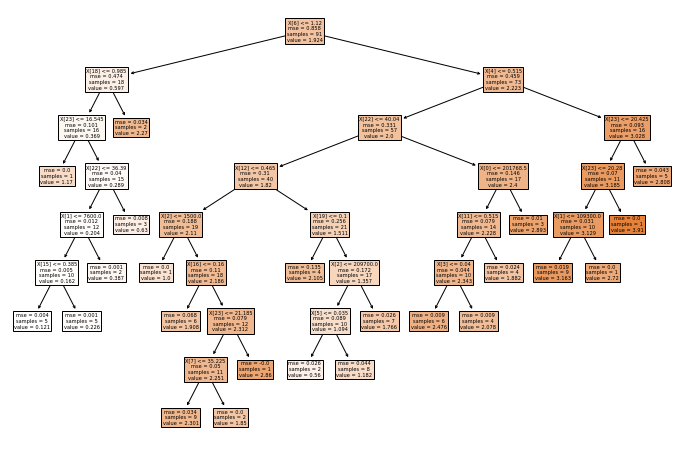

In [163]:
print(tree.plot_tree(model.estimators_[1],filled=True))

In [164]:
for i in range(len(model.estimators_)):
    print(tree.export_text(model.estimators_[i]))


|--- feature_6 <= 1.12
|   |--- feature_2 <= 6952.50
|   |   |--- feature_52 <= 0.50
|   |   |   |--- feature_15 <= 0.60
|   |   |   |   |--- feature_22 <= 36.17
|   |   |   |   |   |--- feature_21 <= 666.46
|   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |--- feature_21 >  666.46
|   |   |   |   |   |   |--- value: [0.26]
|   |   |   |   |--- feature_22 >  36.17
|   |   |   |   |   |--- value: [0.51]
|   |   |   |--- feature_15 >  0.60
|   |   |   |   |--- value: [0.84]
|   |   |--- feature_52 >  0.50
|   |   |   |--- value: [2.40]
|   |--- feature_2 >  6952.50
|   |   |--- value: [1.77]
|--- feature_6 >  1.12
|   |--- feature_5 <= 4.95
|   |   |--- feature_51 <= 0.50
|   |   |   |--- feature_6 <= 20.06
|   |   |   |   |--- value: [2.68]
|   |   |   |--- feature_6 >  20.06
|   |   |   |   |--- value: [1.97]
|   |   |--- feature_51 >  0.50
|   |   |   |--- feature_14 <= 0.02
|   |   |   |   |--- feature_2 <= 209700.00
|   |   |   |   |   |--- value: [0.89]
|   |   |   | 